Question 1.1

In [1]:
install.packages("readr")
devtools::install_github("homerhanumat/tigerstats",build_vignettes=TRUE)

Installation du package dans 'C:/Users/David/AppData/Roaming/SPB_Data/R/win-library/4.1'
(car 'lib' n'est pas spécifié)



package 'readr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'readr'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problème lors de la copie de C:\Users\David\AppData\Roaming\SPB_Data\R\win-library\4.1\00LOCK\readr\libs\x64\readr.dll vers C:\Users\David\AppData\Roaming\SPB_Data\R\win-library\4.1\readr\libs\x64\readr.dll: Permission denied"
Warning message:
"restored 'readr'"



The downloaded binary packages are in
	C:\Users\David\AppData\Local\Temp\RtmpeSf9HQ\downloaded_packages


Skipping install of 'tigerstats' from a github remote, the SHA1 (17067f7e) has not changed since last install.
  Use `force = TRUE` to force installation



In [2]:
library(readr)
library(tigerstats)

Le chargement a nécessité le package : abd

Le chargement a nécessité le package : nlme

Le chargement a nécessité le package : lattice

Le chargement a nécessité le package : grid

Le chargement a nécessité le package : mosaic

Registered S3 method overwritten by 'mosaic':
  method                           from   
  fortify.SpatialPolygonsDataFrame ggplot2


The 'mosaic' package masks several functions from core packages in order to add 
additional features.  The original behavior of these functions should not be affected by this.


Attachement du package : 'mosaic'


Les objets suivants sont masqués depuis 'package:dplyr':

    count, do, tally


L'objet suivant est masqué depuis 'package:Matrix':

    mean


L'objet suivant est masqué depuis 'package:ggplot2':

    stat


Les objets suivants sont masqués depuis 'package:stats':

    binom.test, cor, cor.test, cov, fivenum, IQR, median, prop.test,
    quantile, sd, t.test, var


Les objets suivants sont masqués depuis 'package:base'

In [3]:
cd <- read_tsv("clinical-data.tsv") 
spec(cd)
summary(cd)


Rows: 136 Columns: 12
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: "\t"
chr (5): SMPLID, SMPTHNTS, COHORT, SUBJID, IMGURL
dbl (7): SEX, AGE, HGHT, WGHT, BMI, TRISCHD, DTHHRDY

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


cols(
  SMPLID = col_character(),
  SEX = col_double(),
  AGE = col_double(),
  HGHT = col_double(),
  WGHT = col_double(),
  BMI = col_double(),
  SMPTHNTS = col_character(),
  COHORT = col_character(),
  TRISCHD = col_double(),
  DTHHRDY = col_double(),
  SUBJID = col_character(),
  IMGURL = col_character()
)

    SMPLID               SEX            AGE             HGHT      
 Length:136         Min.   :1.00   Min.   :21.00   Min.   :58.00  
 Class :character   1st Qu.:1.00   1st Qu.:30.00   1st Qu.:66.00  
 Mode  :character   Median :1.00   Median :38.00   Median :68.00  
                    Mean   :1.36   Mean   :37.53   Mean   :68.18  
                    3rd Qu.:2.00   3rd Qu.:45.25   3rd Qu.:71.00  
                    Max.   :2.00   Max.   :49.00   Max.   :76.00  
      WGHT            BMI          SMPTHNTS            COHORT         
 Min.   : 92.0   Min.   :18.58   Length:136         Length:136        
 1st Qu.:159.8   1st Qu.:24.27   Class :character   Class :character  
 Median :184.8   Median :27.75   Mode  :character   Mode  :character  
 Mean   :182.9   Mean   :27.55                                        
 3rd Qu.:205.2   3rd Qu.:31.07                                        
 Max.   :264.0   Max.   :34.86                                        
    TRISCHD          DTHHRDY      

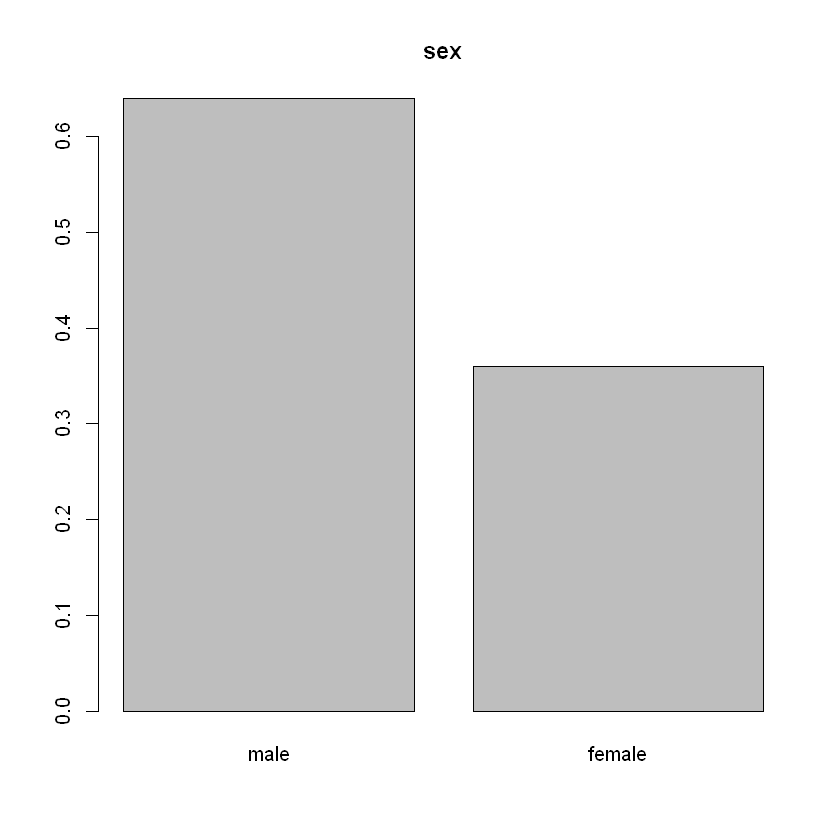

In [4]:
barplot(prop.table(table(data.frame(cd$SEX))), main="sex", names.arg=c("male","female"))

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,21,30,38,45.25,49,37.52941,8.611741,136,0


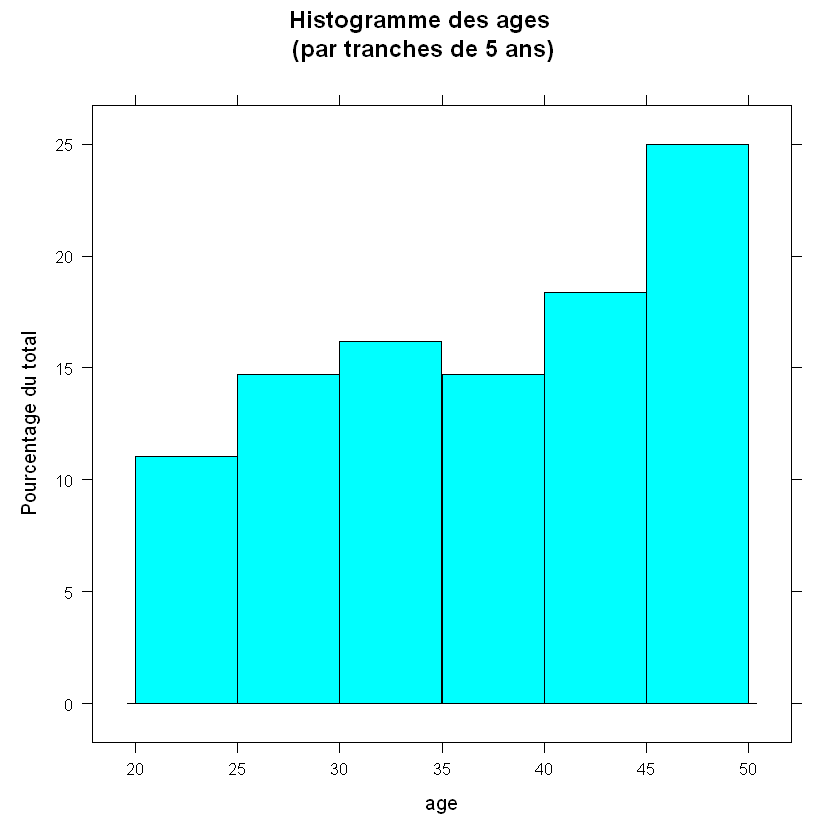

In [20]:
histogram(data.frame(cd$AGE)[,1],main="Histogramme des ages\n (par tranches de 5 ans)", xlab="age",breaks=6)
favstats(data.frame(cd$AGE)[,1])

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,58,66,68,71,76,68.18478,3.89909,136,0


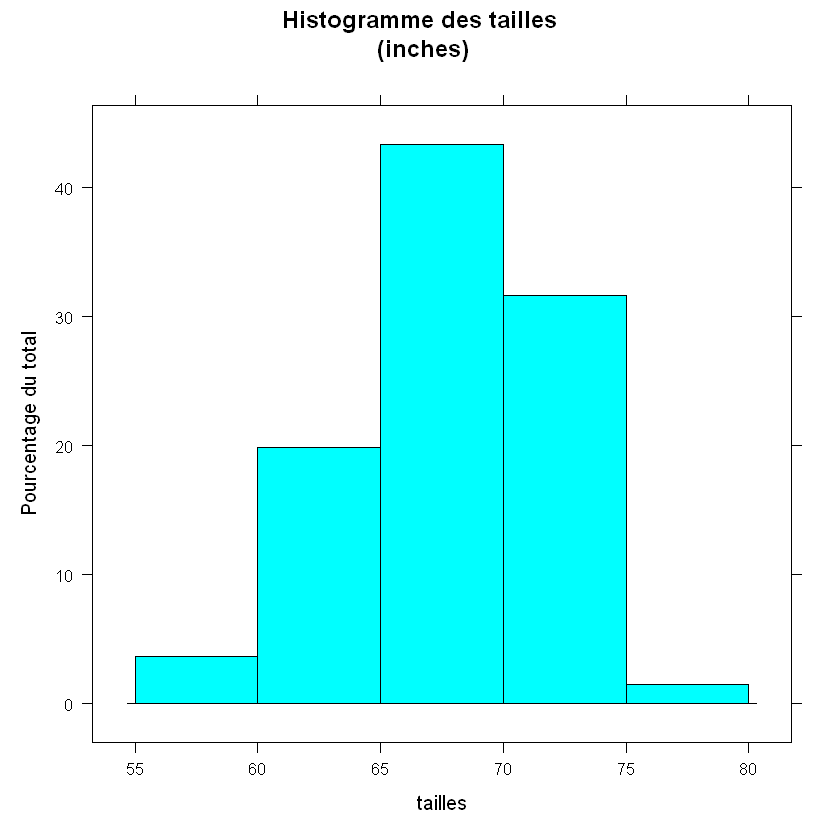

In [24]:
histogram(data.frame(cd$HGHT)[,1],main="Histogramme des tailles\n (inches)", xlab="tailles",breaks=6)
favstats(data.frame(cd$HGHT)[,1])

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,92,159.75,184.8,205.25,264,182.9454,33.58838,136,0


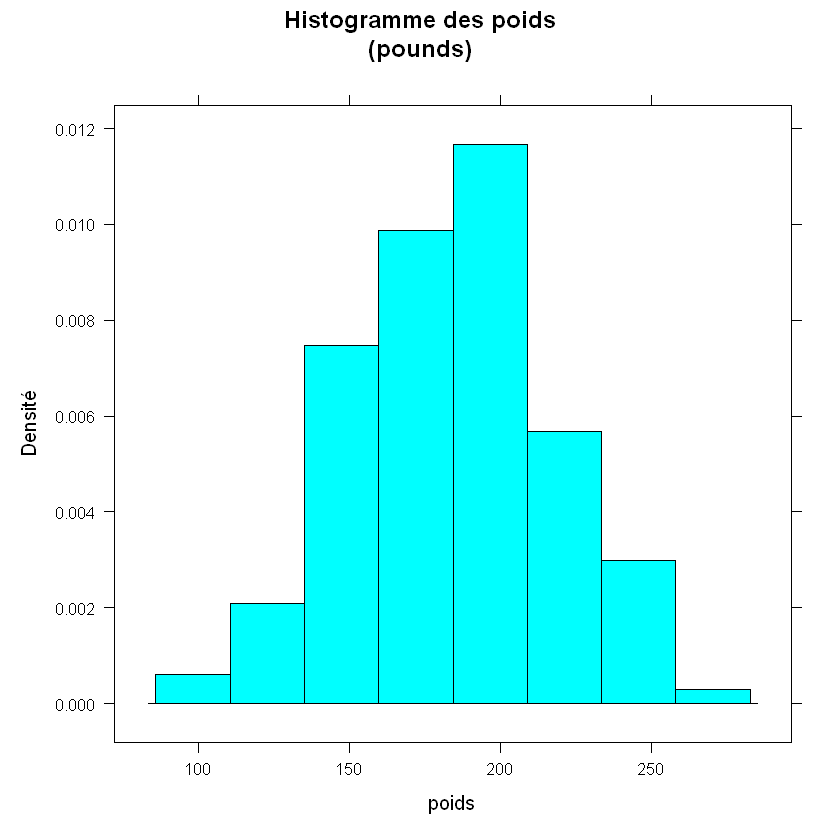

In [25]:
histogram(data.frame(cd$WGHT)[,1],main="Histogramme des poids\n (pounds) ", xlab="poids")
favstats(data.frame(cd$WGHT)[,1])

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,18.58,24.2675,27.75,31.0725,34.86,27.55471,3.925531,136,0


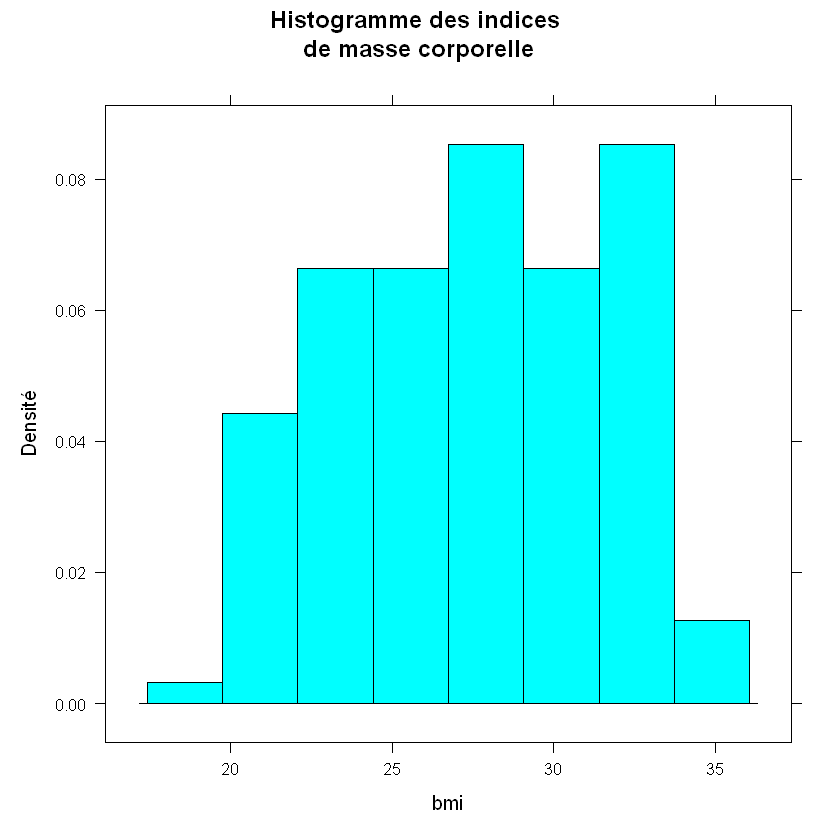

In [17]:
histogram(data.frame(cd$BMI)[,1],main="Histogramme des indices \n de masse corporelle ", xlab="bmi")
favstats(data.frame(cd$BMI)[,1])

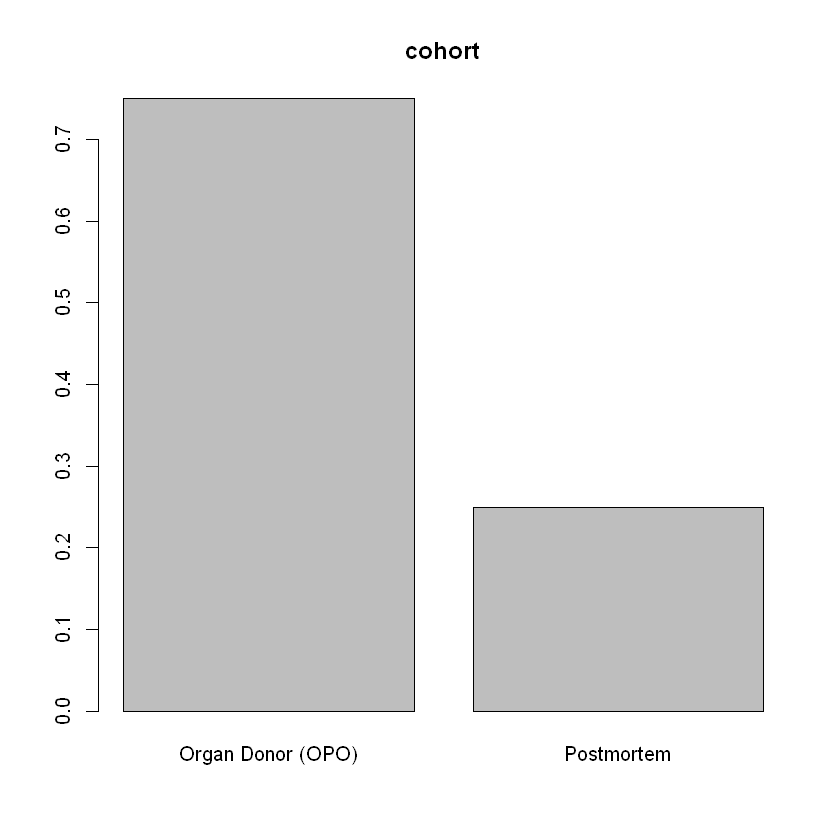

In [15]:
barplot(prop.table(table(data.frame(cd$COHORT))), main="cohort")

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,15,61.5,209,474.25,1641,382.5588,411.018,136,0


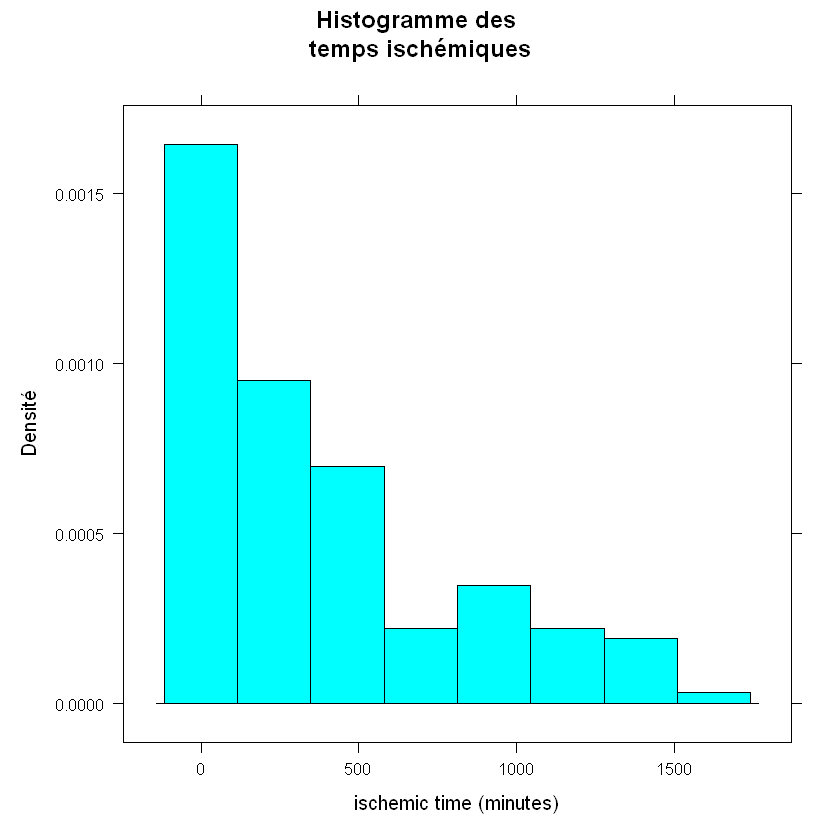

In [26]:
histogram(data.frame(cd$TRISCHD)[,1],main="Histogramme des \n temps ischémiques ", xlab="ischemic time (minutes)")
favstats(data.frame(cd$TRISCHD)[,1])

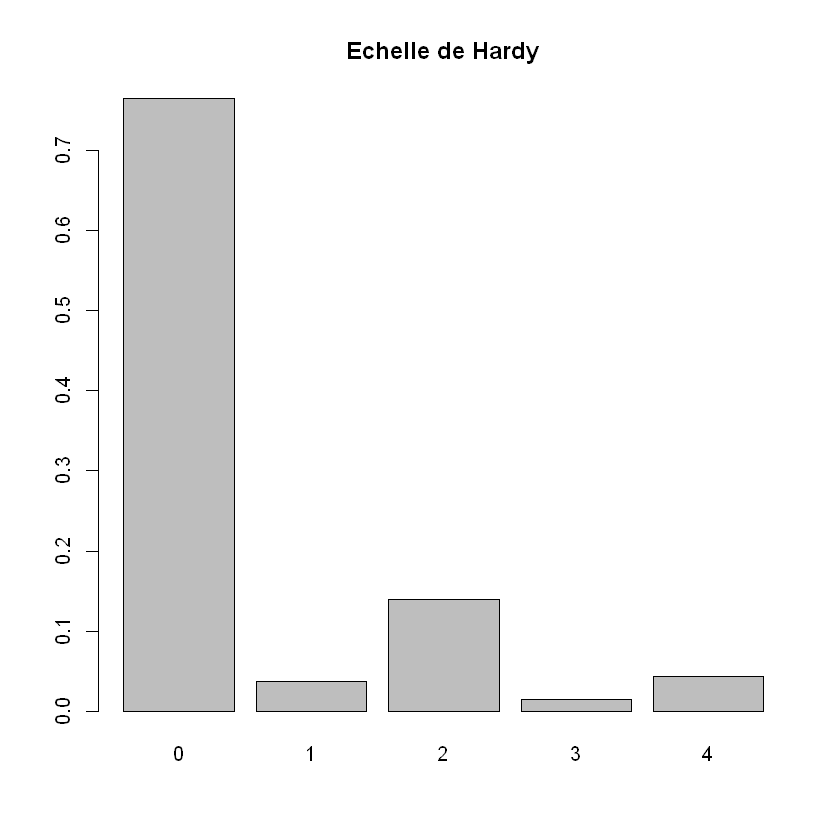

In [23]:
barplot(prop.table(table(data.frame(cd$DTHHRDY))), main="Echelle de Hardy")